In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# import torch
# from torch.distributions import Normal

from palettable.cmocean.sequential import Thermal_8

# palette = Thermal_8.mpl_colors
# sns.set(style="whitegrid", font_scale=2.0, palette=Thermal_8.mpl_colors)

In [2]:
from scipy.stats import beta, lognorm

In [3]:
sns.set(font_scale=1.5, style='whitegrid')
palette = sns.color_palette(Thermal_8.mpl_colors)

In [4]:
# [palette[1], palette[0], palette[4]]

In [5]:
def get_approx_cdf(xs, a_eps):
    a = np.array([1 + a_eps, a_eps])

    sigmas = np.log(1 + 1 / a)
    ys = np.log(a) - sigmas / 2

    z1_ = np.random.lognormal(ys[0], np.sqrt(sigmas[0]), size=100000) # dist_z1.rsample(100)
    z2_ = np.random.lognormal(ys[1], np.sqrt(sigmas[1]), size=100000) # dist_z1.rsample(100)
    zs = z1_ / (z1_ + z2_)
    lognormal_cdf = (zs[:, None] < xs[None, :]).sum(axis=0) / len(z2_)
    return lognormal_cdf

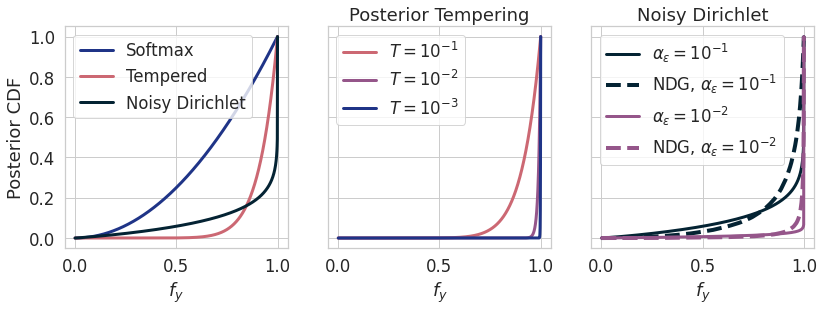

In [6]:
f, arr = plt.subplots(1, 3, figsize=(12, 4), sharey=True)


ce_dist = beta(2, 1)
T = 0.1
temp_dist = beta(1 + 1/T, 1)
a = 0.1
nd_dist = beta(1+a, a)
xs = np.linspace(0., 1, 1000)

# arr[0].plot(xs, ce_dist.cdf(xs), c=palette[1], label=f"Cross Entropy", lw=3)
arr[0].plot(xs, ce_dist.cdf(xs), c=palette[1], label=f"Softmax", lw=3)
arr[0].plot(xs, temp_dist.cdf(xs), c=palette[4], label=f"Tempered", lw=3)
arr[0].plot(xs, nd_dist.cdf(xs), c=palette[0], label=f"Noisy Dirichlet", lw=3)
# arr.grid()
plt.tight_layout()
arr[0].legend()
arr[0].set_ylabel("Posterior CDF", fontsize=18)

T = 0.1
temp_dist = beta(1 + 1/T, 1)
arr[1].plot(xs, temp_dist.cdf(xs), c=palette[4], label=r"$T=10^{-1}$", lw=3)
T = 0.01
temp_dist = beta(1 + 1/T, 1)
arr[1].plot(xs, temp_dist.cdf(xs), c=palette[3], label=r"$T=10^{-2}$", lw=3)
T = 0.001
temp_dist = beta(1 + 1/T, 1)
arr[1].plot(xs, temp_dist.cdf(xs), c=palette[1], label=r"$T=10^{-3}$", lw=3)
# arr.grid()
plt.tight_layout()
arr[1].legend()
arr[1].set_title("Posterior Tempering", fontsize=18)

a = 0.1
nd_dist = beta(1+a, a)
xs = np.linspace(0., 1, 1000)
lognormal_cdf = get_approx_cdf(xs, a)
arr[2].plot(xs, nd_dist.cdf(xs), c=palette[0], label=r"$\alpha_{\epsilon}=10^{-1}$", lw=3)
arr[2].plot(xs, lognormal_cdf, "--", c=palette[0], label=r"NDG, $\alpha_{\epsilon}=10^{-1}$", lw=4)
a = 0.01
nd_dist = beta(1+a, a)
xs = np.linspace(0., 1, 1000)
lognormal_cdf = get_approx_cdf(xs, a)
arr[2].plot(xs, nd_dist.cdf(xs), c=palette[3], label=r"$\alpha_{\epsilon}=10^{-2}$", lw=3)
arr[2].plot(xs, lognormal_cdf, "--", c=palette[3], label=r"NDG, $\alpha_{\epsilon}=10^{-2}$",  lw=4)
arr[2].legend()
arr[2].set_title("Noisy Dirichlet", fontsize=18)

for ax in arr:
    ax.set_xlabel("$f_y$", fontsize=18)
plt.savefig("../../Papers/data_aug_bnns/arxiv/figures/coinflip/comparison.pdf",
           bbox_inches="tight")

# Develop

### Just Betas

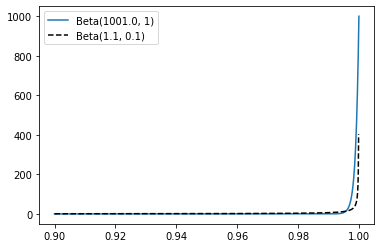

In [4]:
T = 0.001
dist = beta(1 + 1/T, 1)
a = 0.1
dist2 = beta(1+a, a)
xs = np.linspace(0.9, 1, 1000)

plt.plot(xs, dist.pdf(xs), label=f"Beta({1 + 1/T}, 1)")
plt.plot(xs, dist2.pdf(xs), "--k", label=f"Beta({1 + a}, {a})")
plt.legend()

### Log-Gaussian approximation

In [60]:
# dist_z1 = lognorm(s= sigmas[0], loc=ys[0])
# dist_z2 = lognorm(s= sigmas[1], loc=ys[1])

In [111]:
a_eps = 0.1
a = np.array([1 + a_eps, a_eps])

sigmas = np.log(1 + 1 / a)
ys = np.log(a) - sigmas / 2

z1_ = np.random.lognormal(ys[0], np.sqrt(sigmas[0]), size=100000) # dist_z1.rsample(100)
z2_ = np.random.lognormal(ys[1], np.sqrt(sigmas[1]), size=100000) # dist_z1.rsample(100)
zs = z1_ / (z1_ + z2_)

Text(0.5, 1.0, 'a_eps = 0.1')

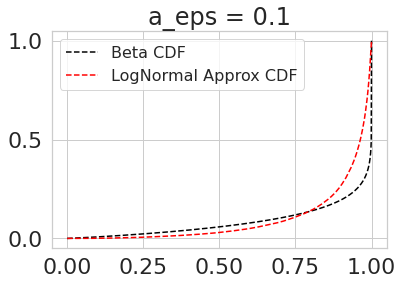

In [112]:
# xs = np.linspace(0., 1, 1000)
xs = np.linspace(0., 1, 1000)
lognormal_cdf = (zs[:, None] < xs[None, :]).sum(axis=0) / len(z2_)

dist2 = beta(1+a_eps, a_eps)
true_cdf = dist2.cdf(xs)
plt.plot(xs, true_cdf, "--k", label="Beta CDF")
plt.plot(xs, lognormal_cdf, "--r", label="LogNormal Approx CDF")
plt.legend(fontsize=16)
plt.title(f"a_eps = {a_eps}")

In [97]:
true_cdf

array([0.00000000e+00, 9.93616806e-07, 1.98960783e-06, 2.98711912e-06,
       3.98597077e-06, 4.98607845e-06, 5.98739336e-06, 6.98988400e-06,
       7.99352856e-06, 8.99831130e-06, 1.00042205e-05, 1.10112471e-05,
       1.20193842e-05, 1.30286265e-05, 1.40389696e-05, 1.50504102e-05,
       1.60629458e-05, 1.70765743e-05, 1.80912942e-05, 1.91071045e-05,
       2.01240043e-05, 2.11419933e-05, 2.21610711e-05, 2.31812379e-05,
       2.42024939e-05, 2.52248394e-05, 2.62482750e-05, 2.72728013e-05,
       2.82984192e-05, 2.93251294e-05, 3.03529331e-05, 3.13818312e-05,
       3.24118250e-05, 3.34429156e-05, 3.44751044e-05, 3.55083926e-05,
       3.65427818e-05, 3.75782734e-05, 3.86148688e-05, 3.96525697e-05,
       4.06913777e-05, 4.17312944e-05, 4.27723214e-05, 4.38144606e-05,
       4.48577136e-05, 4.59020822e-05, 4.69475683e-05, 4.79941736e-05,
       4.90419001e-05, 5.00907496e-05, 5.11407241e-05, 5.21918255e-05,
       5.32440558e-05, 5.42974169e-05, 5.53519108e-05, 5.64075397e-05,
      

(0.9, 1.0)

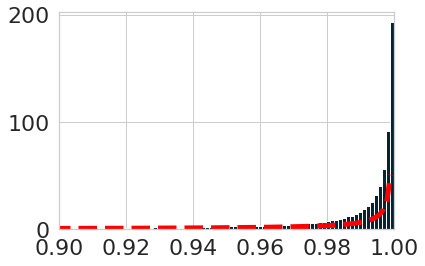

In [79]:

plt.hist(zs, bins=np.linspace(0.5, 1.1, 500), density=True);

dist2 = beta(1+a_eps, a_eps)

plt.plot(xs, dist2.pdf(xs), "--r", label=f"Beta({1 + a_eps}, {a_eps})", lw=5)
plt.xlim(0.9, 1.)

## ...

In [6]:
def get_distribution(eta):
    alpha = torch.tensor([1. + eta, eta])
    var = (1./alpha + 1).log()
    y = alpha.log() - var / 2
    return Normal(y, var.sqrt())

In [ ]:
yvals = torch.linspace(-20, 20, 1000).unsqueeze(-1).repeat(1, 2)

In [4]:
alpha_list = [0.001, 0.01, 0.1, 0.25]
dist_list = [get_distribution(alpha).log_prob(yvals).exp() for alpha in alpha_list]

Text(0.5, 1.0, 'Unobserved Class')

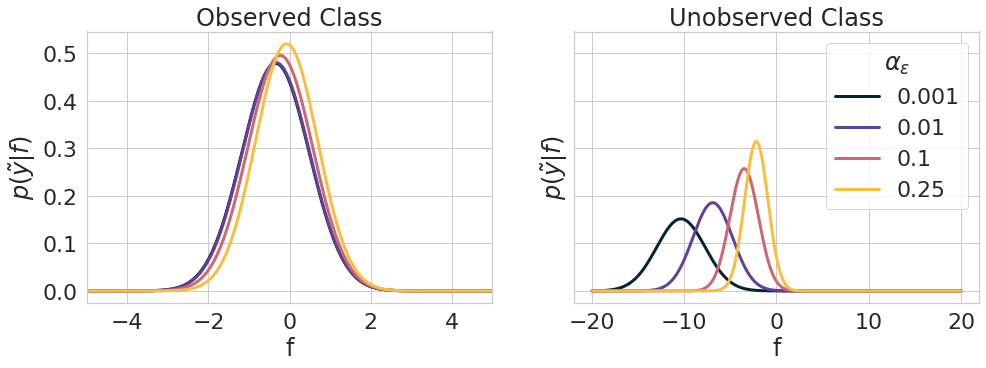

In [5]:
fig, ax = plt.subplots(1, 2, figsize = (16,5), sharey=True)

for i in range(4):
    ax[0].plot(yvals[...,0], dist_list[i][..., 0], linewidth=3, color=palette[i*2])
ax[0].set_xlim((-5, 5))


for i in range(4):
    ax[1].plot(yvals[..., 0], dist_list[i][..., 1], linewidth=3, color = palette[i*2], label = str(alpha_list[i]), )
ax[1].legend(title=r'$\alpha_\epsilon$')   
ax[0].set_xlabel("f")
ax[1].set_xlabel("f")
ax[0].set_ylabel(r'$p(\tilde{y} | f)$')
ax[1].set_ylabel(r'$p(\tilde{y} | f)$')

ax[0].set_title("Observed Class")
ax[1].set_title("Unobserved Class")
# [plt.setp(a.spines.values(), linewidth=3) for a in ax]
# sns.despine()

# plt.savefig("dirichlet_likelihoods.pdf", bbox_inches = "tight")

In [13]:
ps = torch.linspace(1/500, 1., 500)

In [14]:
logit_space = torch.stack((ps.log(), (ps).log())).t()

In [15]:
logit_space.shape

torch.Size([500, 2])

In [16]:
alpha_list = [0.001, 0.01, 0.1, 0.25]
dist_list = [get_distribution(alpha).log_prob(logit_space).exp() for alpha in alpha_list]

Text(0.5, 1.0, 'Unobserved Class')

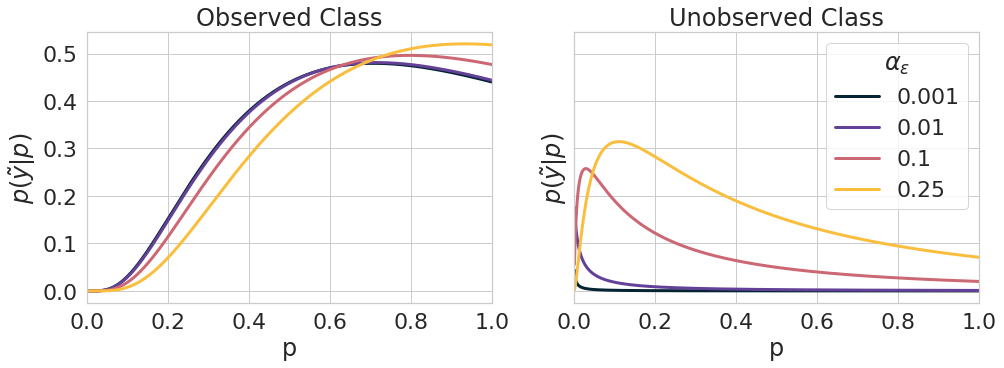

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (16,5), sharey=True)

for i in range(4):
    ax[0].plot(ps, dist_list[i][..., 0], linewidth=3, color=palette[i*2])
ax[0].set_xlim((0, 1))
ax[1].set_xlim((0, 1))

for i in range(4):
    ax[1].plot(ps, dist_list[i][..., 1], linewidth=3, color = palette[i*2], label = str(alpha_list[i]), )
ax[1].legend(title=r'$\alpha_\epsilon$')   
ax[0].set_xlabel("p")
ax[1].set_xlabel("p")
ax[0].set_ylabel(r'$p(\tilde{y} | p)$')
ax[1].set_ylabel(r'$p(\tilde{y} | p)$')

ax[0].set_title("Observed Class")
ax[1].set_title("Unobserved Class")

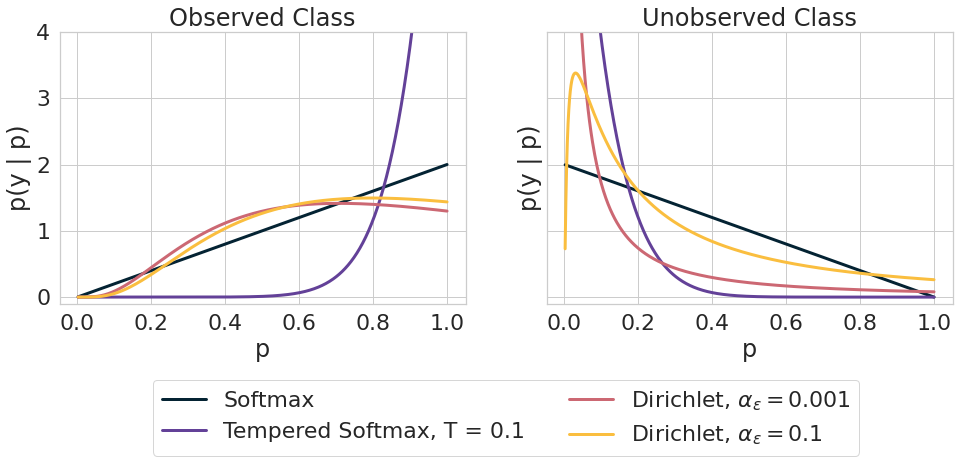

In [23]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5), sharey=True)
ax[0].plot(ps, ps * 2, linewidth = 3)
ax[1].plot(ps, (1 - ps) * 2, linewidth = 3, label = "Softmax")

ax[0].plot(ps, (ps**(1/0.1)) / (ps**(1/0.1)).sum() * 500, linewidth =3, color = palette[2])
ax[1].plot(ps, ((1 - ps)**(1/0.1)) / ((1 - ps)**(1/0.1)).sum() * 500, linewidth =3, 
           label = "Tempered Softmax, T = 0.1", color = palette[2])

ax[0].plot(ps, dist_list[0][..., 0] / dist_list[0][..., 0].sum() * 500, linewidth = 3, color = palette[4])
ax[1].plot(ps, dist_list[0][..., 1] / dist_list[0][..., 1].sum() * 500, linewidth = 3, color = palette[4],
           label = r'Dirichlet, $\alpha_\epsilon=0.001$')

ax[0].plot(ps, dist_list[2][..., 0] / dist_list[2][..., 0].sum() * 500, linewidth = 3, color = palette[6])
ax[1].plot(ps, dist_list[2][..., 1] / dist_list[2][..., 1].sum() * 500, linewidth = 3, color = palette[6],
           label = r'Dirichlet, $\alpha_\epsilon=0.1$')

ax[1].legend(ncol = 2, loc = "lower center", bbox_to_anchor = (-0.1, -0.6))

ax[0].set_ylim((-0.1, 4))

ax[0].set_xlabel("p")
ax[1].set_xlabel("p")

ax[0].set_ylabel("p(y | p)")
ax[1].set_ylabel("p(y | p)")

ax[0].set_title("Observed Class")
ax[1].set_title("Unobserved Class")
plt.savefig("likelihoods_obs_models.pdf", bbox_inches = "tight")

In [19]:
dist_list[0][..., 0].sum() / 500

tensor(0.3390)